# Assignment : Clustering and Classificaton with Python

#### Gökay Berkem Turan



## Table of Content

[Purpose](#purpose)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling for Clustering](#clusteringmodel)  
[Clustering results](#clustering)    
[Modeling for Classification](#classificationmodel)  
[Evaluation](#evaluation)  
[References](#references)   


## Purpose <a class="anchor" id="purpose"></a>

In this assignment, we will try to detect haricot bean species,using machine learning methods from the features created by digitizing the images of the various haricot beans. In this assignment, we will use clustering and classification methods with original and normalized data then we will comment on the results. While doing these we will also deal with missing values if exist and we will make feature selection.

## Data Understanding<a class="anchor" id="data_understanding"></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

By using the following head and tail functions, we can get general information about dataset.

In [3]:
rawOriginalData = pd.read_csv("/content/drive/MyDrive/BBM469-Assignment2/data.csv") #path of the csv file
rawOriginalData.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
rawOriginalData.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


We can also get column names of dataset using following statement.

In [5]:
rawOriginalData.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

Our dataset consists of 13611 rows and 17 columns.Since we know that one of them is the target variable( 'Class' ), we can understand that the others are features that may affect the target variable.

In [6]:
print(rawOriginalData.shape)

(13611, 17)


---
We can get detailed and statistical information about dataset. We can use info 
and describe function to get detailed and statistical information.
According to the outputs of these functions we can say that:
*   There are 13611 entries.
*   There are 14 variables of type float,2 variables of type int and 1 variable of type object.
*   Dataset does not contain any null variable, also there is no variable that has '0' value. All variables are non-null.
*   We can get minimum, maximum and mean values and other statistical infomations from the outputs below.


In [7]:
rawOriginalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [8]:
rawOriginalData.describe(include="all")

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DERMASON
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3546
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063,NaN
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366,NaN
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,NaN
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703,NaN
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386,NaN
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883,NaN


We can understand the distribution of 'class' variables by looking at the graph below. As we can understand from the graph below, the most common class in the dataset is 'DERMASON' and the least common in the dataset is 'BOMBAY'.

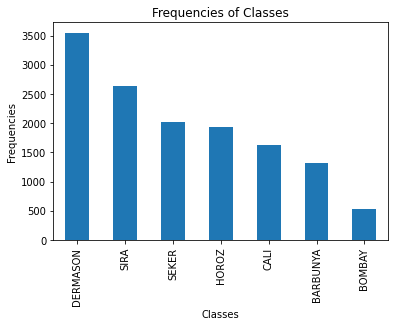

In [9]:
rawOriginalData["Class"].value_counts().plot(kind='bar')
plt.title('Frequencies of Classes')
plt.xlabel('Classes')
plt.ylabel('Frequencies')
plt.show()

## Data Preparation<a class="anchor" id="data_preparation"></a>

Since we cannat make feature selection due to target variable is of type string, we need to convert target variable into numeric type.

You can see converted version of dataset from the output below.


In [10]:
classToNumeric = {'DERMASON': 1, 'SIRA': 2, 'SEKER': 3, 'HOROZ': 4, 'CALI': 5, 'BARBUNYA': 6, 'BOMBAY': 7}
rawOriginalData.Class.replace(classToNumeric, inplace= True)
rawOriginalData.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,3
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,3
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,3
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,3
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,3


**FEATURE SELECTION**

You can see correlation matrix from the output below. We can use correlation matrix to see correlations between features in the dataset. Correlation matrix help us to find features that have more effect than other features.

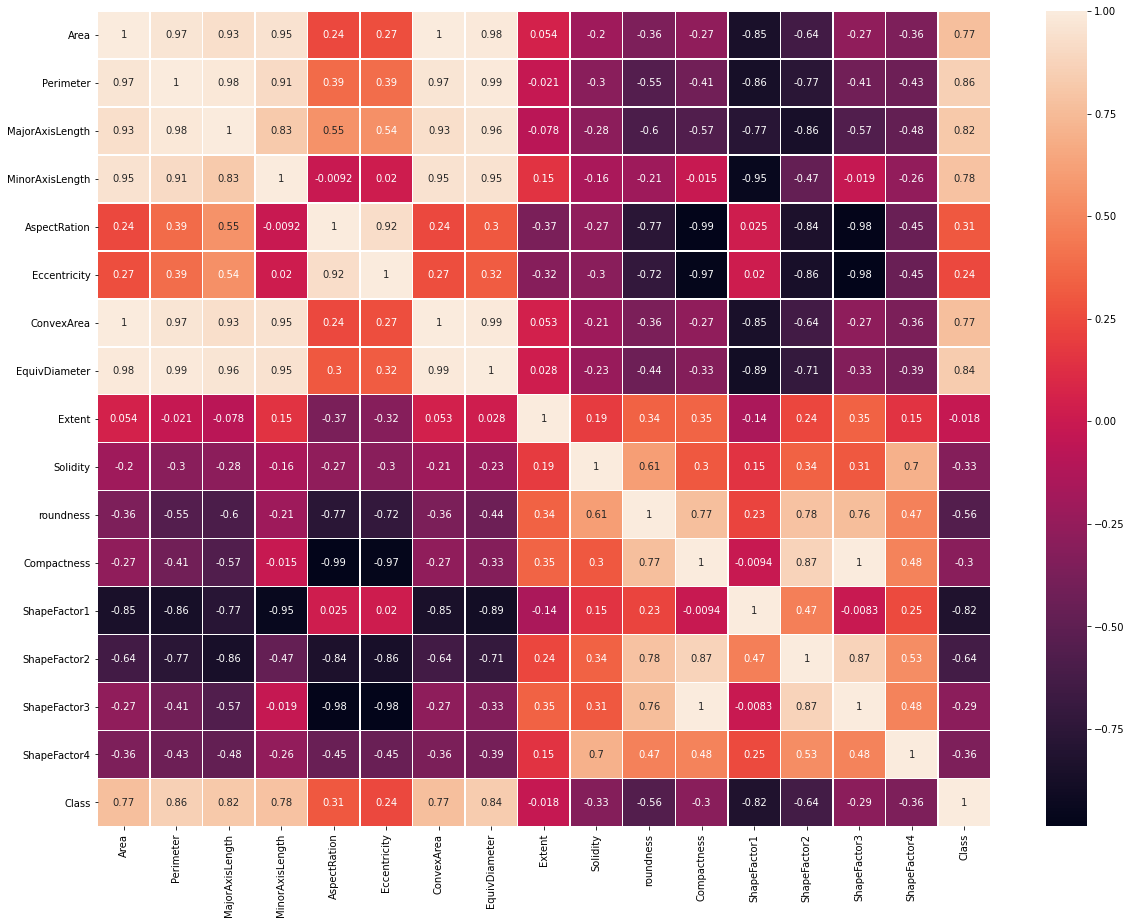

In [11]:
correlationMatrix = rawOriginalData.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlationMatrix, annot=True,linewidths=.5)
plt.show()

For feature selection, I have used SelectKBest method. I have extracted 6 best features and I have used chi2 function as a score function.

In [12]:
independentFeatures = rawOriginalData.iloc[:,:16]  # Independent Features
targetFeature = rawOriginalData.iloc[:,16]    # Target Feature (Class)
print(independentFeatures)
print("---------------------------------------------------------")
print(targetFeature)

        Area  Perimeter  ...  ShapeFactor3  ShapeFactor4
0      28395    610.291  ...      0.834222      0.998724
1      28734    638.018  ...      0.909851      0.998430
2      29380    624.110  ...      0.825871      0.999066
3      30008    645.884  ...      0.861794      0.994199
4      30140    620.134  ...      0.941900      0.999166
...      ...        ...  ...           ...           ...
13606  42097    759.696  ...      0.642988      0.998385
13607  42101    757.499  ...      0.676099      0.998219
13608  42139    759.321  ...      0.676884      0.996767
13609  42147    763.779  ...      0.668237      0.995222
13610  42159    772.237  ...      0.616221      0.998180

[13611 rows x 16 columns]
---------------------------------------------------------
0        3
1        3
2        3
3        3
4        3
        ..
13606    1
13607    1
13608    1
13609    1
13610    1
Name: Class, Length: 13611, dtype: int64


In [13]:
bestSixFeatures = SelectKBest(score_func=chi2, k=6)
fit = bestSixFeatures.fit(independentFeatures,targetFeature)
scores = pd.DataFrame(fit.scores_)
features = pd.DataFrame(independentFeatures.columns)
featuresAndScores = pd.concat([features,scores],axis=1)
featuresAndScores.columns = ['Features','Scores']
print(featuresAndScores.nlargest(6,'Scores'))

          Features        Scores
6       ConvexArea  2.081131e+08
0             Area  2.046267e+08
1        Perimeter  6.683193e+05
2  MajorAxisLength  2.825600e+05
7    EquivDiameter  1.729274e+05
3  MinorAxisLength  1.235873e+05


According to SelectKBest outputs above, most important features are Area, Perimeter, MajorAxisLength, MinorAxisLength, EquivDiameter and ConvexArea but when we look at the correlation matrix above, correlation between features ConvexArea and Area is 1, so we can omit one of them because they have same effect on Class feature. For this reason, I have decided to omit Area feature and I have decided to use 5 most important features. These faetures are ConvexArea, Perimeter, MajorAxisLength, MinorAxisLength and EquivDiameter. 

As you can see from the code cells below, I have created new dataframe named editedOriginalDataset, this dataframe consists of 5 best features. These features are ConvexArea, Perimeter, MajorAxisLength, MinorAxisLength and EquivDiameter.

In [14]:
editedOriginalDataset = rawOriginalData[['ConvexArea', 'Perimeter','MajorAxisLength', 'MinorAxisLength','EquivDiameter']].copy()

In [15]:
print(editedOriginalDataset.shape)
editedOriginalDataset.head()

(13611, 5)


,ConvexArea,Perimeter,MajorAxisLength,MinorAxisLength,EquivDiameter
0,28715,610.291,208.178117,173.888747,190.141097
1,29172,638.018,200.524796,182.734419,191.272751
2,29690,624.110,212.826130,175.931143,193.410904
3,30724,645.884,210.557999,182.516516,195.467062
4,30417,620.134,201.847882,190.279279,195.896503


As you can see from the code cells below, I have created new dataframe named normalizedDataset. This normalizedDataset dataframe is created by normalizing editedOriginalDataset. Min-max normalization is used for normalization.

In [16]:
normalizedDataset=((editedOriginalDataset-editedOriginalDataset.min())/(editedOriginalDataset.max()-editedOriginalDataset.min()))

In [17]:
normalizedDataset.head()

,ConvexArea,Perimeter,MajorAxisLength,MinorAxisLength,EquivDiameter
0,0.033107,0.058574,0.044262,0.152142,0.070804
1,0.034991,0.077557,0.030479,0.178337,0.073577
2,0.037126,0.068035,0.052633,0.158190,0.078816
3,0.041389,0.082942,0.048548,0.177691,0.083854
4,0.040123,0.065313,0.032862,0.200679,0.084906


## Modeling for Clustering <a class="anchor" id="clusteringmodel"></a>

I have chosen k-Means clustering according to my researches. There are several reasons why I choose k-Means clustering. First of all k-means clustering is relatively simple to implement. Other reason is that, k-means clustering scales to large datasets.

As a parameter,I have chosen "n_clusters" parameter as 7 because there are 7 different type of classes in the dataset. Also we can use "elbow method" to choose optimal n_clusters.

As you can see from the code cells below, although I know the number of classes in the dataset, I used the elbow method and the n_cluster parameter is also 7 according to the elbow method.

**K-Means Clustering with Edited Original Dataset**

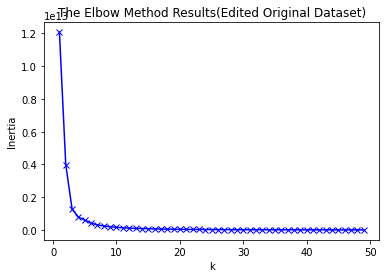

<Figure size 1080x720 with 0 Axes>

In [18]:
listOfInertias = []
clusterRange = list(range(1,50))
for k in clusterRange:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit(editedOriginalDataset)
    listOfInertias.append(kmeansModel.inertia_)

plt.plot(clusterRange, listOfInertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method Results(Edited Original Dataset)')
plt.figure(figsize=(15,10))
plt.show()

In [19]:
kmeans = KMeans(n_clusters=7,random_state=1)
y_kmeans = kmeans.fit_predict(editedOriginalDataset)
centersOfClusters = kmeans.cluster_centers_
print(centersOfClusters)

[[6.89434477e+04 1.02170102e+03 3.85389449e+02 2.26394315e+02
  2.93771050e+02]
 [1.98292327e+05 1.69323707e+03 6.39643548e+02 3.92683714e+02
  4.98532334e+02]
 [3.11808748e+04 6.50257220e+02 2.38036509e+02 1.65161160e+02
  1.97752614e+02]
 [4.14694467e+04 7.54984141e+02 2.76711771e+02 1.90001675e+02
  2.28338240e+02]
 [5.28191765e+04 8.86974009e+02 3.45342353e+02 1.94235993e+02
  2.57398561e+02]
 [1.60104604e+05 1.51061199e+03 5.60876066e+02 3.61467658e+02
  4.48313187e+02]
 [8.43777637e+04 1.12432337e+03 4.23069838e+02 2.52026637e+02
  3.24932499e+02]]


**K-Means Clustering with Normalized Dataset**

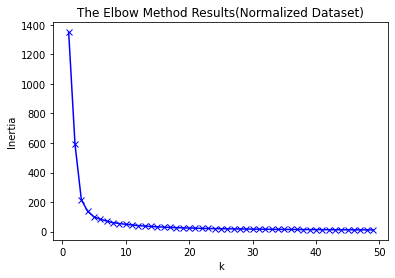

<Figure size 1080x720 with 0 Axes>

In [20]:
listOfInertias = []
clusterRange = list(range(1,50))
for k in clusterRange:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit(normalizedDataset)
    listOfInertias.append(kmeansModel.inertia_)

plt.plot(clusterRange, listOfInertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method Results(Normalized Dataset)')
plt.figure(figsize=(15,10))
plt.show()

In [21]:
kmeansNormalized = KMeans(n_clusters=7,random_state=1)
y_kmeansNormalized = kmeansNormalized.fit_predict(normalizedDataset)
centersOfClustersNormalized = kmeansNormalized.cluster_centers_
print(centersOfClustersNormalized)

[[0.20319032 0.34297855 0.35946203 0.32090609 0.33005482]
 [0.10530303 0.19274236 0.21234489 0.21211888 0.19541293]
 [0.64044256 0.72714098 0.73865563 0.74620157 0.75472475]
 [0.03613397 0.07456477 0.09128855 0.10633225 0.07592298]
 [0.14331831 0.27493117 0.33854208 0.19646438 0.25075034]
 [0.07154949 0.13055535 0.13169387 0.19255712 0.14096388]
 [0.26438872 0.41416513 0.43391947 0.38479428 0.40312471]]


## Clustering results<a class="anchor" id="clustering"></a>

**Edited Original Dataset Clustering Results**

In [22]:
X = editedOriginalDataset.copy()
X = np.array(X)

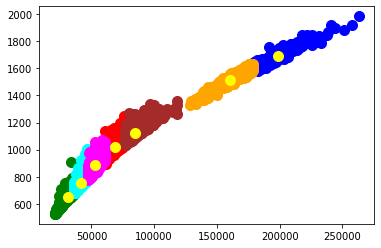

In [23]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta')
plt.scatter(X[y_kmeans==5, 0], X[y_kmeans==5, 1], s=100, c='orange')
plt.scatter(X[y_kmeans==6, 0], X[y_kmeans==6, 1], s=100, c='brown')
plt.scatter(centersOfClusters[:, 0], centersOfClusters[:,1], s = 100, c = 'yellow', label = 'Centroids')

**Normalized Dataset Clustering Results**

In [24]:
XNormalized = normalizedDataset.copy()
XNormalized = np.array(XNormalized)

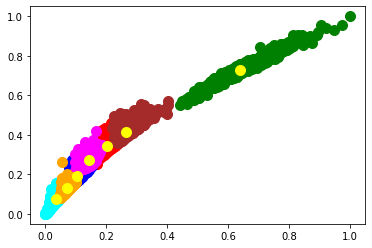

In [25]:
plt.scatter(XNormalized[y_kmeansNormalized==0, 0], XNormalized[y_kmeansNormalized==0, 1], s=100, c='red')
plt.scatter(XNormalized[y_kmeansNormalized==1, 0], XNormalized[y_kmeansNormalized==1, 1], s=100, c='blue')
plt.scatter(XNormalized[y_kmeansNormalized==2, 0], XNormalized[y_kmeansNormalized==2, 1], s=100, c='green')
plt.scatter(XNormalized[y_kmeansNormalized==3, 0], XNormalized[y_kmeansNormalized==3, 1], s=100, c='cyan')
plt.scatter(XNormalized[y_kmeansNormalized==4, 0], XNormalized[y_kmeansNormalized==4, 1], s=100, c='magenta')
plt.scatter(XNormalized[y_kmeansNormalized==5, 0], XNormalized[y_kmeansNormalized==5, 1], s=100, c='orange')
plt.scatter(XNormalized[y_kmeansNormalized==6, 0], XNormalized[y_kmeansNormalized==6, 1], s=100, c='brown')
plt.scatter(centersOfClustersNormalized[:, 0], centersOfClustersNormalized[:,1], s = 100, c = 'yellow', label = 'Centroids')


## Modeling for Classification <a class="anchor" id="classificationmodel"></a>

I have used K-Nearest Neighbors for classification. There are several reasons why I use KNN. First of all KNN algorithm is versatile, other reason is that KNN algorithm is easy to implement and lastly,we can get high accuracies with KNN algorithm.

In the KNN algorithm there is one parameter and this parameter is number of neighbors. We can choose this parameter by trying different parameters and comparing results of these parameters. For this reason firstly I will split edited original dataset into train and test then I will try different parameters

**Classification with Edited Original Dataset**

As you can see from the code cells below, I have splitted edited original dataset into train and test. I have splitted data as %80 train data and %20 test data. You can see lengths of splitted datasets from the code cells below.

In [27]:
classesOfOriginalData = rawOriginalData['Class'].copy()

In [28]:
original_train,original_test,classesOfOriginalData_train,classesOfOriginalData_test = train_test_split(editedOriginalDataset,classesOfOriginalData,test_size=0.2,random_state=1)

In [29]:
print("Length of original_train",len(original_train))
print("Length of original_test",len(original_test))
print("Length of classesOfOriginalData_train",len(classesOfOriginalData_train))
print("Length of classesOfOriginalData_test",len(classesOfOriginalData_test))

Length of original_train 10888
Length of original_test 2723
Length of classesOfOriginalData_train 10888
Length of classesOfOriginalData_test 2723


In [30]:
original_train.head()

,ConvexArea,Perimeter,MajorAxisLength,MinorAxisLength,EquivDiameter
2663,70526,1103.241,396.140798,223.268240,296.641419
7648,38979,733.994,272.173897,180.771739,221.429857
7480,36235,704.049,255.609616,178.903958,213.302466
3339,98108,1252.315,434.980462,283.482724,350.195888
4179,69449,1014.851,390.126383,225.082546,293.907577


As you can see from the code cell below, I have tried number of neighbor values from 1 to 25 and then I have visualized it. I used number of neighbor value which has best test accuracy.

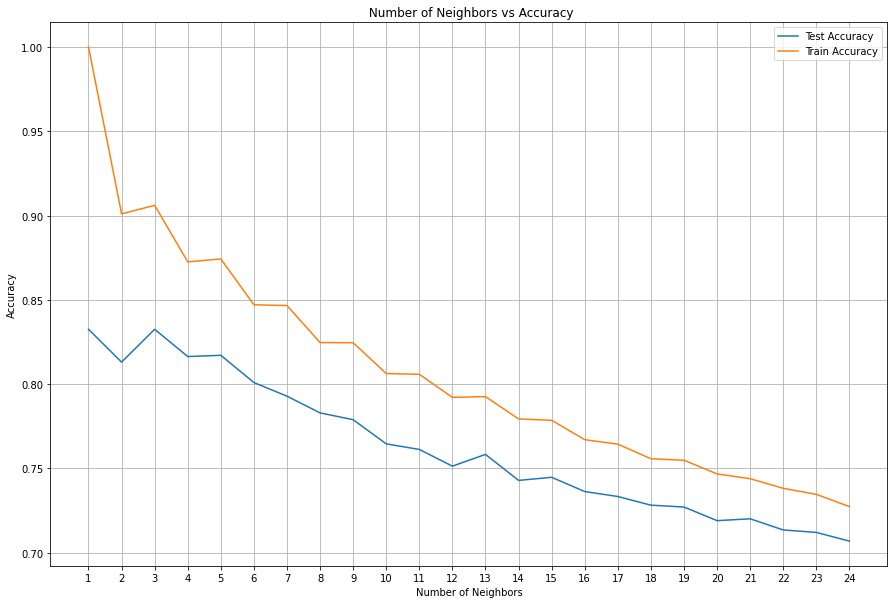

In [31]:
listOfK = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
for k in listOfK:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(original_train,classesOfOriginalData_train)
    train_accuracy.append(knn.score(original_train,classesOfOriginalData_train))
    test_accuracy.append(knn.score(original_test,classesOfOriginalData_test))

plt.figure(figsize=[15,10])
plt.plot(listOfK, test_accuracy, label = 'Test Accuracy')
plt.plot(listOfK, train_accuracy, label = 'Train Accuracy')
plt.legend()
plt.xticks(listOfK)
plt.grid()
plt.title(' Number of Neighbors vs Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

As you can see from the graph above, I got the best test accuracy when number of neighbor is 1,so I have used n_neighbors parameter as 1.

In [32]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(original_train,classesOfOriginalData_train)
prediction = knn.predict(original_test)
print('Accuracy: ',knn.score(original_test,classesOfOriginalData_test))

Accuracy:  0.8325376423062798


**Classification with Normalized Dataset**

As you can see from the code cells below, I have normalized splitted edited original dataset.

In [33]:
normalized_train = ((original_train-original_train.min())/(original_train.max()-original_train.min()))
normalized_test = ((original_test-original_test.min())/(original_test.max()-original_test.min()))

In [34]:
normalized_train.head()

,ConvexArea,Perimeter,MajorAxisLength,MinorAxisLength,EquivDiameter
2663,0.205469,0.396064,0.382776,0.298371,0.331751
7648,0.075419,0.143265,0.159516,0.172525,0.147468
7480,0.064107,0.122764,0.129684,0.166993,0.127554
3339,0.319173,0.498125,0.452724,0.476686,0.462970
4179,0.201029,0.335549,0.371944,0.303744,0.325052


In [35]:
normalized_test.head()

,ConvexArea,Perimeter,MajorAxisLength,MinorAxisLength,EquivDiameter
10057,0.158389,0.278196,0.317914,0.233763,0.268485
13354,0.079139,0.149506,0.168324,0.153756,0.151669
13141,0.073072,0.136729,0.147240,0.157649,0.141464
8634,0.100606,0.199427,0.228457,0.157041,0.184142
12579,0.060520,0.116180,0.103030,0.162970,0.119562


As you can see from the code cell below, I have tried number of neighbor values from 1 to 30 and then I have visualized it. I used number of neighbor value which has best test accuracy.

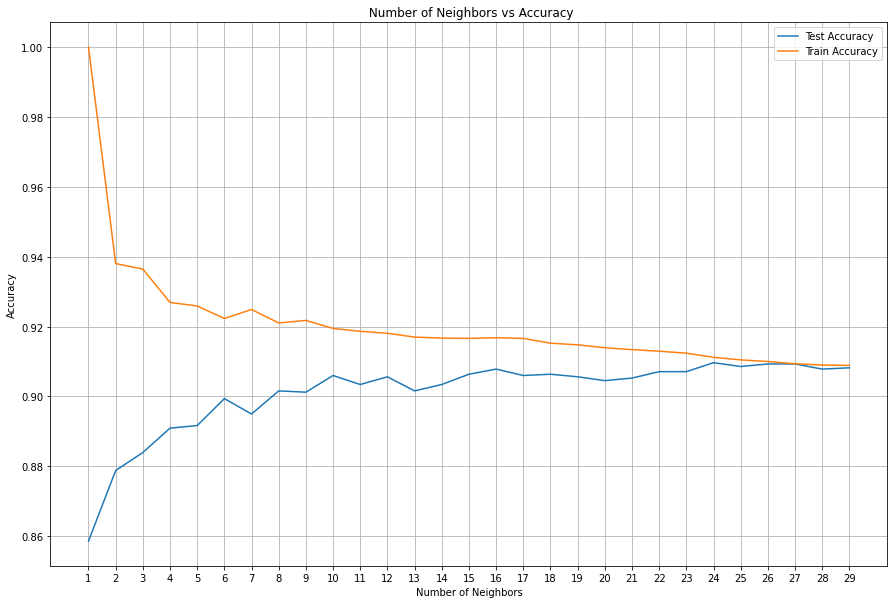

In [36]:
listOfK = np.arange(1, 30)
train_accuracy = []
test_accuracy = []
for k in listOfK:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(normalized_train,classesOfOriginalData_train)
    train_accuracy.append(knn.score(normalized_train,classesOfOriginalData_train))
    test_accuracy.append(knn.score(normalized_test,classesOfOriginalData_test))

plt.figure(figsize=[15,10])
plt.plot(listOfK, test_accuracy, label = 'Test Accuracy')
plt.plot(listOfK, train_accuracy, label = 'Train Accuracy')
plt.legend()
plt.xticks(listOfK)
plt.grid()
plt.title(' Number of Neighbors vs Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

As you can see from the graph above, I got the best test accuracy when number of neighbor is 1,so I have used n_neighbors parameter as 24.

In [37]:
knnWithNormalizedData = KNeighborsClassifier(n_neighbors = 24)
knnWithNormalizedData.fit(normalized_train,classesOfOriginalData_train)
predictionNormalized = knnWithNormalizedData.predict(normalized_test)
print('Accuracy: ',knnWithNormalizedData.score(normalized_test,classesOfOriginalData_test))

Accuracy:  0.9096584649283878


## Evaluation<a class="anchor" id="evaluation"></a>

**Evaluation of Classification of Edited Original Dataset**

In [38]:
confusionMatrixOriginal = confusion_matrix(classesOfOriginalData_test, prediction)
print(confusionMatrixOriginal)

[[626  65   9   5   0   0   0]
 [ 63 419  16  19   4   0   0]
 [ 27  30 343   1   0   4   0]
 [  4  21   0 340   9  12   0]
 [  0   0   0  12 277  43   1]
 [  1  16   0  15  79 159   0]
 [  0   0   0   0   0   0 103]]


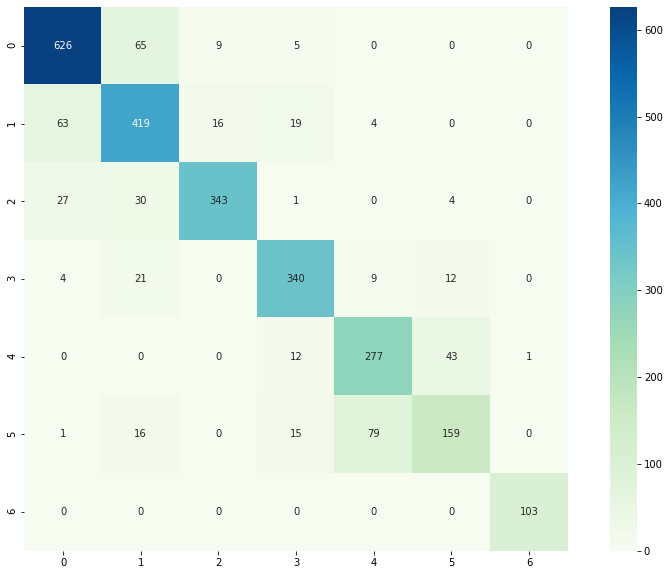

In [39]:
plt.figure(figsize=(15,10))
heatMapOriginal = sns.heatmap(confusionMatrixOriginal,square=True,annot=True,fmt='d',cbar=True,cmap=plt.cm.GnBu)
plt.show()

In [40]:
print(classification_report(classesOfOriginalData_test,prediction))

              precision    recall  f1-score   support

           1       0.87      0.89      0.88       705
           2       0.76      0.80      0.78       521
           3       0.93      0.85      0.89       405
           4       0.87      0.88      0.87       386
           5       0.75      0.83      0.79       333
           6       0.73      0.59      0.65       270
           7       0.99      1.00      1.00       103

    accuracy                           0.83      2723
   macro avg       0.84      0.83      0.84      2723
weighted avg       0.83      0.83      0.83      2723



**Evaluation of Classification of Normalized Dataset**

In [41]:
confusionMatrixNormalized = confusion_matrix(classesOfOriginalData_test, predictionNormalized)
print(confusionMatrixNormalized)

[[655  47   2   1   0   0   0]
 [ 49 454   4  14   0   0   0]
 [ 16  24 361   0   0   4   0]
 [  3   8   0 370   2   3   0]
 [  0   1   0  10 299  23   0]
 [  0   8   0   3  24 235   0]
 [  0   0   0   0   0   0 103]]


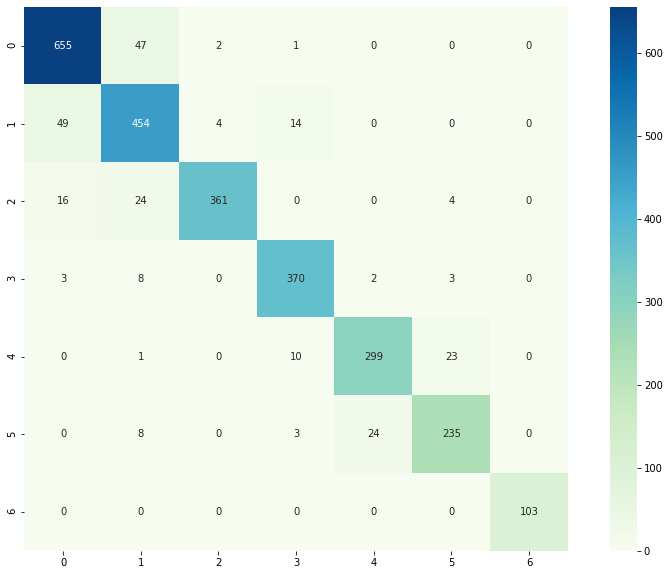

In [42]:
plt.figure(figsize=(15,10))
heatMapNormalized = sns.heatmap(confusionMatrixNormalized,square=True,annot=True,fmt='d',cbar=True,cmap=plt.cm.GnBu)
plt.show()

In [43]:
print(classification_report(classesOfOriginalData_test,predictionNormalized))

              precision    recall  f1-score   support

           1       0.91      0.93      0.92       705
           2       0.84      0.87      0.85       521
           3       0.98      0.89      0.94       405
           4       0.93      0.96      0.94       386
           5       0.92      0.90      0.91       333
           6       0.89      0.87      0.88       270
           7       1.00      1.00      1.00       103

    accuracy                           0.91      2723
   macro avg       0.92      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723



When we look at the classification results, we can get more accuracy with normalized dataset.

## References<a class="anchor" id="references"></a>

*   https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages
*   https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e#:~:text=Feature%20Selection%20is%20the%20process,learn%20based%20on%20irrelevant%20features
*   https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
*   https://github.com/aucan/DataScienceTutorials/blob/master/BBM469_Tutorial_7_Machine_Learning.ipynb
*   https://medium.com/@sametgirgin/k-means-clustering-model-in-6-steps-with-python-dfe95e5a5fac
*   https://www.mygreatlearning.com/blog/knn-algorithm-introduction/
*   https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners


**Disclaimer!** <font color='grey'>This notebook was prepared by Gökay Berkem Turan as an assigment for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>